# AI Group Project

Make sure to `pip install` all required libs from `requirements.txt` using `pip install -r requirements.txt`

## Import libs

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ProgSnap2 import PS2

## Data preparation

In [4]:
semester = 'S19'
BASE_PATH = os.path.join('data', semester)
TRAIN_PATH = os.path.join(BASE_PATH, 'Train')
TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [6]:
early_train = pd.read_csv(os.path.join(TRAIN_PATH, 'early.csv'))
early_train

,SubjectID,AssignmentID,ProblemID,Attempts,CorrectEventually,Label
0,04c32d4d95425f73b3a1d6502aed4d48,439.0,1,1,True,True
1,04c32d4d95425f73b3a1d6502aed4d48,439.0,3,2,True,True
2,04c32d4d95425f73b3a1d6502aed4d48,439.0,5,3,True,True
3,04c32d4d95425f73b3a1d6502aed4d48,439.0,12,1,True,True
4,04c32d4d95425f73b3a1d6502aed4d48,439.0,13,2,True,True
...,...,...,...,...,...,...
6637,ffb72475a81de0e95b910ffad039f5c2,492.0,37,1,True,True
6638,ffb72475a81de0e95b910ffad039f5c2,492.0,38,1,True,True
6639,ffb72475a81de0e95b910ffad039f5c2,492.0,39,1,True,True
6640,ffb72475a81de0e95b910ffad039f5c2,492.0,40,3,True,True


In [7]:
late_train = pd.read_csv(os.path.join(TRAIN_PATH, 'late.csv'))
late_train

,SubjectID,AssignmentID,ProblemID,Label
0,04c32d4d95425f73b3a1d6502aed4d48,494.0,41,False
1,04c32d4d95425f73b3a1d6502aed4d48,494.0,43,True
2,04c32d4d95425f73b3a1d6502aed4d48,494.0,44,True
3,04c32d4d95425f73b3a1d6502aed4d48,494.0,46,True
4,04c32d4d95425f73b3a1d6502aed4d48,494.0,49,True
...,...,...,...,...
4196,ffb72475a81de0e95b910ffad039f5c2,502.0,64,True
4197,ffb72475a81de0e95b910ffad039f5c2,502.0,70,True
4198,ffb72475a81de0e95b910ffad039f5c2,502.0,71,True
4199,ffb72475a81de0e95b910ffad039f5c2,502.0,112,True


In [38]:
X_train_base = late_train.copy().drop('Label', axis=1)
y_train = late_train['Label'].values
X_train_base.shape, y_train.shape

((4201, 3), (4201,))

In [13]:
from sklearn.preprocessing import OneHotEncoder

problem_encoder = OneHotEncoder().fit(X_train_base[PS2.ProblemID].values.reshape(-1, 1))
problem_encoder.transform(X_train_base[PS2.ProblemID].values.reshape(-1, 1)).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
def extract_instance_features(instance, early_df):
    instance = instance.copy()
    subject_id = instance[PS2.SubjectID]
    early_problems = early_df[early_df[PS2.SubjectID] == subject_id]
    # Extract very naive features about the student
    # (without respect to the problem bring predicted)
    # Number of early problems attempted
    instance['ProblemsAttempted'] = early_problems.shape[0]
    # Percentage of early problems gotten correct eventually
    instance['PercCorrectEventually'] = np.mean(early_problems['CorrectEventually'])
    # Median attempts made on early problems
    instance['MedAttempts'] = np.median(early_problems['Attempts'])
    # Max attempts made on early problems
    instance['MaxAttempts'] = np.max(early_problems['Attempts'])
    # Percentage of problems gotten correct on the first try
    instance['PercCorrectFirstTry'] = np.mean(early_problems['Attempts'] == 1)
    df_generatedFeatures = pd.read_csv(os.path.join(TRAIN_PATH, 'newEarlyTrain.csv'))
    df_generatedFeatures_problems = df_generatedFeatures[df_generatedFeatures[PS2.SubjectID] == subject_id]
    # print(len(df_generatedFeatures_problems))
    instance['PercSubjectSyntaxErrors'] = np.median(df_generatedFeatures_problems['pSubjectSyntaxError'])
    instance['PercProbSemanticErrors'] = np.median(df_generatedFeatures_problems['pSubjectSemanticError'])
    # instance['SubjectMeanAttempts'] = np.mean(df_generatedFeatures_problems['pMedian'])
    instance = instance.drop('SubjectID')
    return instance

In [16]:
print(extract_instance_features(X_train_base.iloc[1], early_train))

AssignmentID                  494.0
ProblemID                        43
ProblemsAttempted                30
PercCorrectEventually           1.0
MedAttempts                     6.5
MaxAttempts                      45
PercCorrectFirstTry        0.166667
PercSubjectSyntaxErrors       0.667
PercProbSemanticErrors          0.8
Name: 1, dtype: object


In [17]:
print(extract_instance_features(X_train_base.iloc[2], early_train))

AssignmentID                  494.0
ProblemID                        44
ProblemsAttempted                30
PercCorrectEventually           1.0
MedAttempts                     6.5
MaxAttempts                      45
PercCorrectFirstTry        0.166667
PercSubjectSyntaxErrors       0.667
PercProbSemanticErrors          0.8
Name: 2, dtype: object


In [18]:
def extract_features(X, early_df, scaler, is_train):
    # First extract performance features for each row
    features = X.apply(lambda instance: extract_instance_features(instance, early_df), axis=1)
    # Then one-hot encode the problem_id and append it
    problem_ids = problem_encoder.transform(features[PS2.ProblemID].values.reshape(-1, 1)).toarray()
    # Then get rid of nominal features
    features.drop([PS2.AssignmentID, PS2.ProblemID], axis=1, inplace=True)
    # Then scale the continuous features, fitting the scaler if this is training
    if is_train:
        scaler.fit(features)
    features = scaler.transform(features)

    # Return continuous and one-hot features together
    return np.concatenate([features, problem_ids], axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = extract_features(X_train_base, early_train, scaler, True)

print(X_train.shape)
X_train[:2, ]

(4201, 27)


array([[ 0.51751812,  0.58371895,  1.76922077,  1.70602676, -0.89569333,
         0.65105279,  1.62095701,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.51751812,  0.58371895,  1.76922077,  1.70602676, -0.89569333,
         0.65105279,  1.62095701,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate

def metrics(m, X, y, p):
    cv_results = cross_validate(m, X, y, cv=10, scoring=['accuracy', 'f1_macro', 'roc_auc'])
    print(classification_report(y, p))
    print('AUC: ' + str(roc_auc_score(y, p)))
    print('Macro F1: ' + str(f1_score(y, p, average='macro')))    
    print(f'Accuracy (CV): {np.mean(cv_results["test_accuracy"])}')
    print(f'AUC (CV): {np.mean(cv_results["test_roc_auc"])}')
    print(f'Macro F1 (CV): {np.mean(cv_results["test_f1_macro"])}')
    RocCurveDisplay.from_estimator(m, X, y)
    ConfusionMatrixDisplay.from_predictions(y, p)


## LogisticRegressionCV

              precision    recall  f1-score   support

       False       0.59      0.28      0.38      1084
        True       0.79      0.93      0.85      3117

    accuracy                           0.76      4201
   macro avg       0.69      0.61      0.62      4201
weighted avg       0.74      0.76      0.73      4201

AUC: 0.6051913562927738
Macro F1: 0.6158452688549343
Accuracy (CV): 0.7579170908268295
AUC (CV): 0.7568195278649803
Macro F1 (CV): 0.5994554297445956


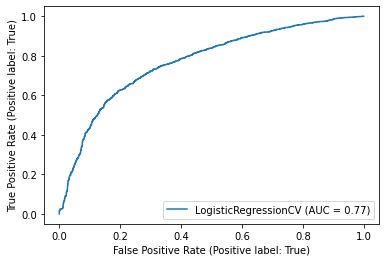

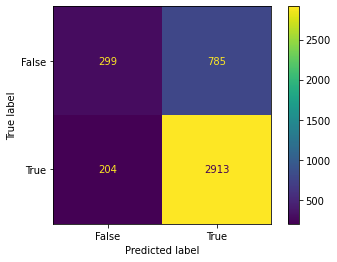

In [54]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)

metrics(model, X_train, y_train, train_predictions)

## RandomForestClassifier

              precision    recall  f1-score   support

       False       0.75      0.23      0.35      1084
        True       0.78      0.97      0.87      3117

    accuracy                           0.78      4201
   macro avg       0.77      0.60      0.61      4201
weighted avg       0.77      0.78      0.74      4201

AUC: 0.6013779038175368
Macro F1: 0.6099395367328618
Accuracy (CV): 0.7286313765411153
AUC (CV): 0.7220326204095698
Macro F1 (CV): 0.5040669524184053


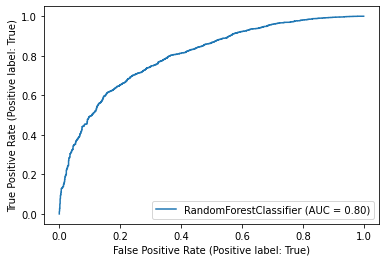

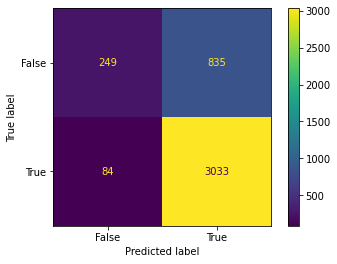

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)

metrics(model, X_train, y_train, train_predictions)

## MLPClassifier

/mnt/c/Users/kaluaim/Code/Artificial-Intelligence-Group-Project/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/mnt/c/Users/kaluaim/Code/Artificial-Intelligence-Group-Project/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/mnt/c/Users/kaluaim/Code/Artificial-Intelligence-Group-Project/venv

              precision    recall  f1-score   support

       False       0.95      0.81      0.87      1084
        True       0.94      0.99      0.96      3117

    accuracy                           0.94      4201
   macro avg       0.94      0.90      0.92      4201
weighted avg       0.94      0.94      0.94      4201

AUC: 0.8954567974457416
Macro F1: 0.9160639360639361
Accuracy (CV): 0.6979165252799457
AUC (CV): 0.6449919445885097
Macro F1 (CV): 0.5468330605057335


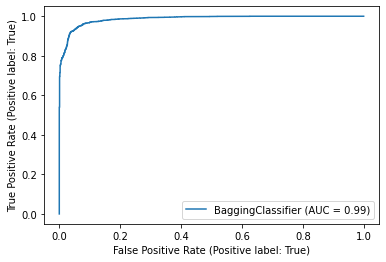

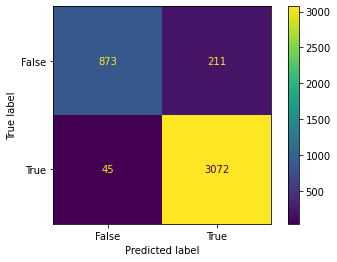

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(50, 25, 2), random_state=42)
model = BaggingClassifier(base_estimator=clf, n_estimators=65, random_state=42)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)

metrics(model, X_train, y_train, train_predictions)